# Minilab 2

Hensikten med denne laboppgaven er: 
1. Kunne måle en tidsserie med akselerasjonsmålinger med phyphox 
2. Eksportere dataene til en PC/mac
3. Åpne datafilen i python/jupyter notebook
4. Hente inn og vurdere på dataene (plotte)
5. Kunne plukke ut et selectivt utvalg fra dataseriene
6. Kunne svare på: <span style="color:red">Hva er den største og minste akselerasjonen du bli utsatt for i en heis som går mellom mer enn to etasjer? </span> 


# 1 Måle akselerasjon i phyphox

Et egnet bygg for å gjøre målinger er foreksempel realfagbygget som har mange heiser. Du har allerede installert phyphox fra øving 1. Før du går inn i heisen, åpne phyphox og velg

<img src="https://raw.githubusercontent.com/tromotho/IFYT1002_BIDATA/refs/heads/main/oving3/bilder/Hovedmeny.jpeg" alt="Bildet av hovedmenyen i phyphox" width="200">

Velg "acceleration withouth g"

<img src="https://raw.githubusercontent.com/tromotho/IFYT1002_BIDATA/refs/heads/main/oving3/bilder/MeasureAcceleration.jpeg" alt="Bildet av hovedmenyen i phyphox" width="200">

Når du trykker på kjør knappen begynner telefonen å ta målinger med akselerometeret. Som du ser får du en akselerasjon i 3 retninger. Nå er det viktig hvordan du plasserer telefonen. Dersom du holder telefonen mot rekkverket eller legger den på gulvet, vil du få bedre og mere stabile målinger. Når du har en måling du er fornøyd med, er det tid for å eksportere datafila. 


# 2 Eksportere data 

Helt til høyre i bildet ser du tre prikker. Her finner du eksporteringsmenyen.

<img src="https://raw.githubusercontent.com/tromotho/IFYT1002_BIDATA/refs/heads/main/oving3/bilder/Eksportere data.jpeg" alt="Eksport menyen i phyphox" width="200">

Velg "export data" og videre, pass på at du velger "CSV Semicolon, decimal point. Da vil hver kolonne i datafila være adskilt med semikolon og det vil være punktum som desimalskilletegn. 

<img src="https://raw.githubusercontent.com/tromotho/IFYT1002_BIDATA/refs/heads/main/oving3/bilder/eksport format.jpeg" alt="Eksport menyen i phyphox" width="200">

Trykk "Export Data". Her får du nå en zip fil som du kan velge hvordan du sender til PC. 

Jeg finner det enklest å bruke epost klienten og sende det til meg selv på epost.

<img src="https://raw.githubusercontent.com/tromotho/IFYT1002_BIDATA/refs/heads/main/oving3/bilder/eksporter epost.jpeg" alt="Eksport menyen i phyphox" width="200">

# 3 Importere fila i jupyter / python 

Nå er det bare å lagre fila og pakke den ut på et sted der du også kan lagre denne jupyter notebook fila. I eksemplet under henter jeg ut data fra en kjøring fra E1 til E4 i Realfagbygget bokk E 20 januar 2025. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the path to your CSV file
#filnavn='C:\\Users\\trotho\\OD\\fag\\IFYT1001\\programmering\\øvinger\\Raw Data_u1_5.csv' # ligger på et annet sted
filnavn='Raw Data_1.csv' # ligger samme sted som jupyter notebook fila
data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)  # Use skip_header=1 to skip the header row if there is one
 


# 4. Hente inn og vurdere på dataene

Først må vi se på dataene. Under har vi hentet inn alle målingne og plottet sammen i samme figur. 

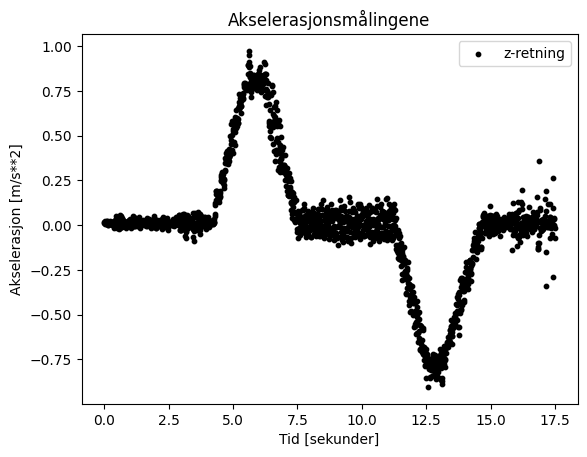

In [9]:
#print(data)
 
#plt.scatter(data[:,0] , data[:,1] , color='blue', marker='s', label='x-retning',s=10)
#plt.scatter(data[:,0] , data[:,2] , color='red', marker='^', label='y-retning',s=10)
plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)


plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
# Add a legend
plt.legend()
 
# Show the plot
plt.show()



<span style="color:red">Ser dataene fornuftig ut i x- og y retning? </span> 

<span style="color:red">Burde du ha noen kriteriene som du kan bruke for å si at resultatene er fornuftige? </span> 

<span style="color:red">Hva du tenker om dette kan du skrive inn i oppgave 6 på øving 3? </span> 

For å kunne se på dataene må vi se nærmere på noen helt spesifikke tidspunkter. Plotter nå bare akselerasjon i z-retning.  


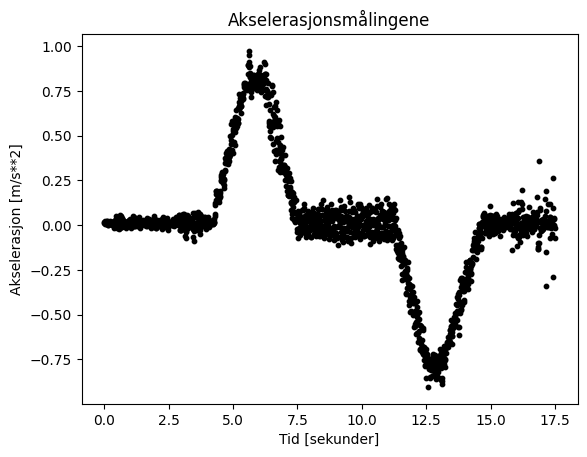

In [5]:

plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')

# Show the plot
plt.show()

# 5. Kunne plukke ut et selectivt utvalg fra dataseriene

For å finne maksimal akselerasjon kan vi plukke ut og data plotte for z-koordinaten for tidspunkt mellom 4 og 8 sekunder 

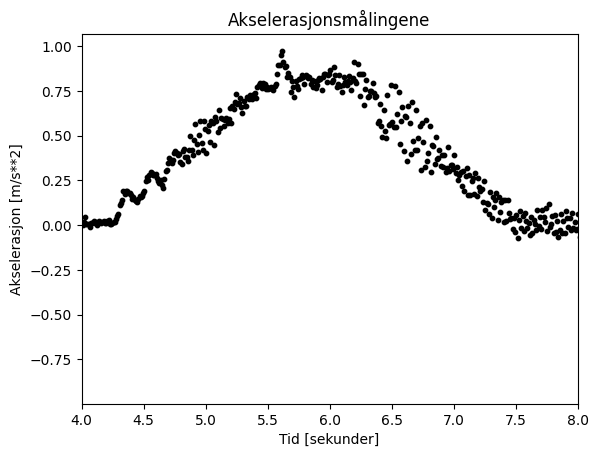

In [10]:

plt.scatter(data[:,0] , data[:,3] , color='black', marker='o', label='z-retning',s=10)

plt.xlim([4,8]) #Begrenser intervallet
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
# Show the plot
plt.show()

Her ser jeg at området rundt 5.40 til 6.3 ser det ut som om vi har en relativt stabil akselerasjon. Nå har jeg behov for å plukke ut målingene som ligger i dette intervallet

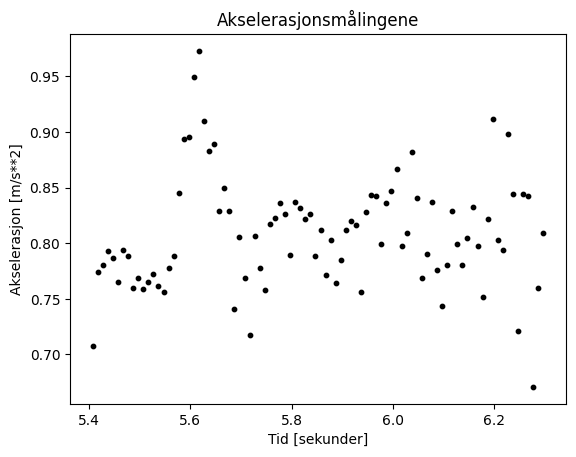

In [11]:
# Søker opp intervallet mellom 5.4 til 6.3 sekunder
intervallA = (data[:,0] >= 5.4) & (data[:,0] <= 6.3) 
plt.scatter(data[intervallA,0] , data[intervallA,3] , color='black', marker='o', label='z-retning',s=10)
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
plt.show()

In [12]:
# Regner ut middelverdi og standardavviket for målingene i intervallet. 

print(f'Maksimal akselerasjon {np.mean(data[intervallA,3]):.4g} ± {np.std(data[intervallA,3]):.2g}')

Maksimal akselerasjon 0.8084 ± 0.05


Gjør nå tilsvarende for å finne den minste akselerasjonen jeg er utsatt for. 

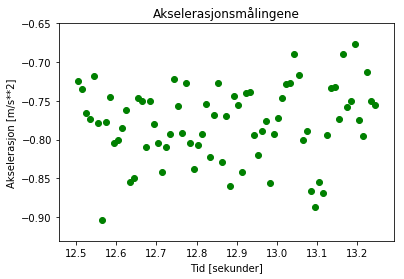

In [45]:
# Søker opp intervallet mellom 5.4 til 6.3 sekunder
intervallB = (data[:,0] >= 12.5) & (data[:,0] <= 13.25) 
plt.scatter(data[intervallB,0] , data[intervallB,3] , color='green', marker='o', label='Data points')
#plt.ylim([8.5,11])
# Add labels and a title
plt.xlabel('Tid [sekunder]')
plt.ylabel('Akselerasjon [m/s**2]')
plt.title('Akselerasjonsmålingene')
 
plt.show()


In [34]:
# Regner ut middelverdi og standardavviket for målingene i intervallet. 

print(f'Maksimal akselerasjon {np.mean(data[intervallB,3]):.4g} ± {np.std(data[intervallB,3]):.2g}')


Maksimal akselerasjon -0.779 ± 0.048


Nå kan du svare relativt presist på hvor stor akselerasjonen du er utsatt for i heisen på Realfagbygget! :-) Husk å ta med resultatene inn i innleveringen. 
